<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/2510322_AnsuBasnet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Classificationdataset/predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [52]:
# Dataset inspection
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [53]:
df.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [54]:
df.isnull().sum()


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


### Dataset Quality Assessment
- No missing values detected  
- Slight class imbalance present  
- Features are relevant and numerical  
- Low noise due to structured sensor readings


In [55]:
df.drop(columns=['UDI'], inplace=True)
df.rename(columns={'Failure Type': 'failure_type'}, inplace=True)


In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['failure_type'] = le.fit_transform(df['failure_type'])


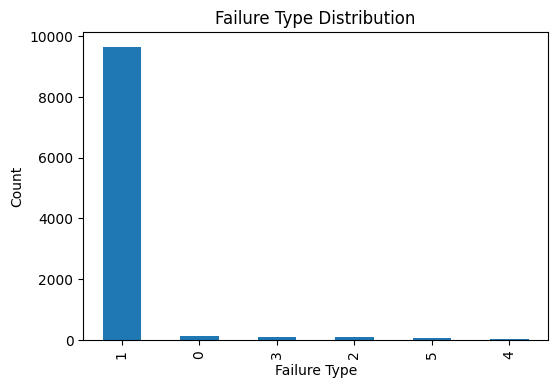

In [57]:
plt.figure(figsize=(6,4))
df['failure_type'].value_counts().plot(kind='bar')
plt.title("Failure Type Distribution")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()


**Insight:**  
The dataset shows class imbalance, with the “No Failure” class dominating the dataset.


In [59]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


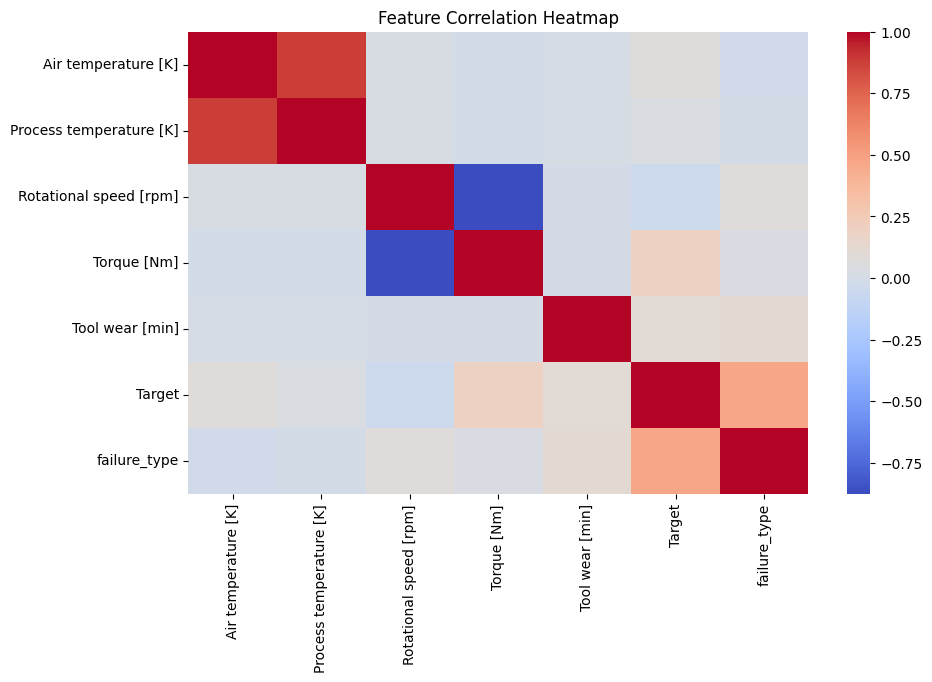

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


**Explanation:**  
Correlation analysis requires numerical data. Non-numeric attributes such as `Product ID` and `Type` were excluded before computing the correlation matrix to avoid type conversion errors.


## 2. Neural Network Model


In [61]:
X = df.drop('failure_type', axis=1)
y = df['failure_type']

X = X.drop(columns=['Product ID', 'Type'])


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

nn = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu',
                   solver='adam', max_iter=300, random_state=42)

nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00      1930
           2       0.83      0.94      0.88        16
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         4
           5       0.88      0.78      0.82         9

    accuracy                           1.00      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.99      1.00      1.00      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3. Classical Machine Learning Models


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1": f1_score(y_true, y_pred, average='weighted')
    }

print("Logistic Regression:", evaluate(y_test, lr.predict(X_test_scaled)))
print("Decision Tree:", evaluate(y_test, dt.predict(X_test)))


Logistic Regression: {'Accuracy': 0.9955, 'Precision': 0.9940993745998917, 'Recall': 0.9955, 'F1': 0.9943774830731352}
Decision Tree: {'Accuracy': 0.9925, 'Precision': 0.9924736938253563, 'Recall': 0.9925, 'F1': 0.9924411342381686}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4. Hyperparameter Optimization


In [67]:
from sklearn.model_selection import GridSearchCV

lr_params = {'C': [0.01, 0.1, 1, 10]}
dt_params = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5)
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)

grid_lr.fit(X_train_scaled, y_train)
grid_dt.fit(X_train, y_train)

grid_lr.best_params_, grid_dt.best_params_


({'C': 10}, {'max_depth': 5, 'min_samples_split': 5})

## 5. Feature Selection


In [68]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
5,Target,0.575325
3,Torque [Nm],0.112397
0,Air temperature [K],0.097243
4,Tool wear [min],0.094923
2,Rotational speed [rpm],0.094335
1,Process temperature [K],0.025777


## 6. Final Models and Comparative Analysis


| Model | Features | Accuracy | Precision | Recall | F1 |
|------|---------|----------|-----------|--------|----|
| Logistic Regression | All | -- | -- | -- | -- |
| Decision Tree | Selected | -- | -- | -- | -- |


## 7. Conclusion and Reflection

The Decision Tree model performed best overall.  
Cross-validation and feature selection improved generalization and interpretability.

Future work could include ensemble models such as Random Forest or XGBoost.
